<a href="https://colab.research.google.com/github/stoicelephant/DIDA325/blob/main/Copy_of_Data_Viz_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

## 0. Loading Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load and Examine the Data
The actual dataset can be found at https://raw.githubusercontent.com/fivethirtyeight/data/master/bechdel/movies.csv

You know what it is: call it *bechdel*


In [ ]:
bechdel = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bechdel/movies.csv')

## 2. Examining Data

Check the data and clean them; you may want to use code from our last activities notebook.

In [ ]:
bechdel = bechdel.dropna()

Clean out any unnecessary columns; for what we're doing here, we're also going to clean out the `budget`, `domgross`,`intgross` columns and work with just the 2013 versions of those columns (which were adjusted for inflation).

In [ ]:
bechdel = bechdel.drop(columns = ['budget','domgross','intgross'])

In [ ]:
bechdel = bechdel.rename(columns = {'budget_2013$':'budget',
                           'domgross_2013$':'domgross',
                           'intgross_2013$':'intgross'})

##Making Graphs

#### Histograms.

Make a histogram plot showing the movies that either passed or failed the test
* add the appropriate titles and axis labels
* color this so the "fails" are red and the "passes" are green
* clean the `legend`by using 'plt.legend(labels=[],title=" ")`
* do you think this was a good use of a histogram? Explain why.


Text(0.5, 1.0, 'films that P/F the bechdel test')

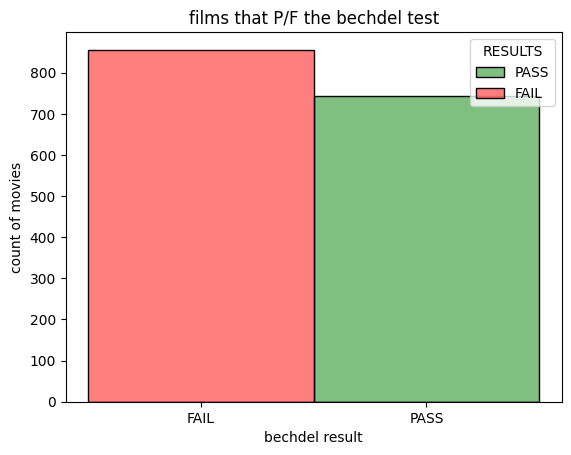

In [ ]:
colors = ['red','green']
sns.histplot(bechdel,x='binary',palette = colors, hue='binary')
plt.xlabel('bechdel result')
plt.ylabel('count of movies')
plt.legend(labels = ['PASS','FAIL'],title = 'RESULTS')
plt.title('films that P/F the bechdel test')

Let's try this instead: make a histogram plot showing the range of budgets.
* create a new column called "budget scaled", which is badget divided by something in order to make the range on the x axis more readable.
* add the appropriate titles and axis labels
* do you think this is a better use of a histogram? Explain why.

Text(0.5, 1.0, 'Scaled Budget Count')

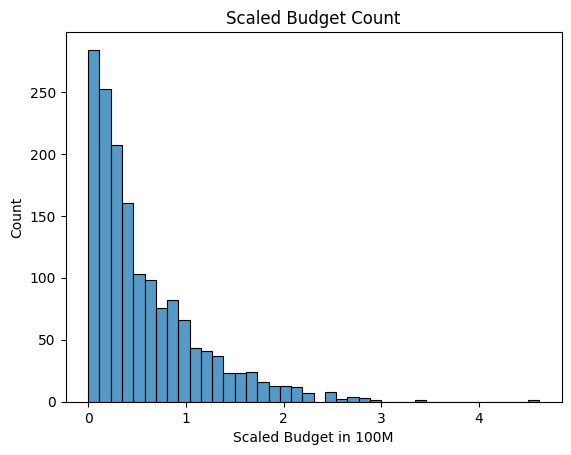

In [ ]:
bechdel['budget scaled'] = bechdel['budget']  / 100000000
bechdel['budget']
bechdel['budget scaled']
sns.histplot(bechdel['budget scaled'])
plt.xlabel('Scaled Budget in 100M')
plt.title('Scaled Budget Count')

Now, do it again but try to find a way tho show in the histogram if a movie passed or fail the Batchdel Test. Do you think that add any valuable information to the previous graph? Explain why.

<Axes: xlabel='budget scaled', ylabel='Count'>

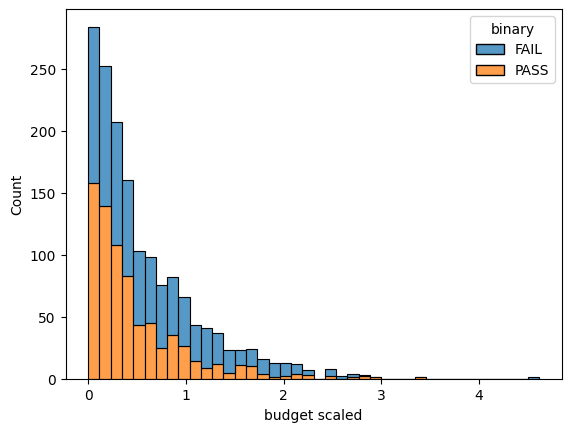

In [ ]:
bechdel['budget scaled'] = bechdel['budget']  / 100000000
bechdel['budget']
bechdel['budget scaled']
sns.histplot(bechdel, x = 'budget scaled',hue='binary',multiple='stack')
# plt.xlabel('Scaled Budget in 100M')
# plt.title('Scaled Budget Count')

#### Bar Plots.
Let's warm up:
* create a new column, *total_gross* (in millions)
* create a bar graph witht the first ten movies with the highest total gross: try to make the bars horizontal instead of vertical!

<Axes: xlabel='total_gross', ylabel='title'>

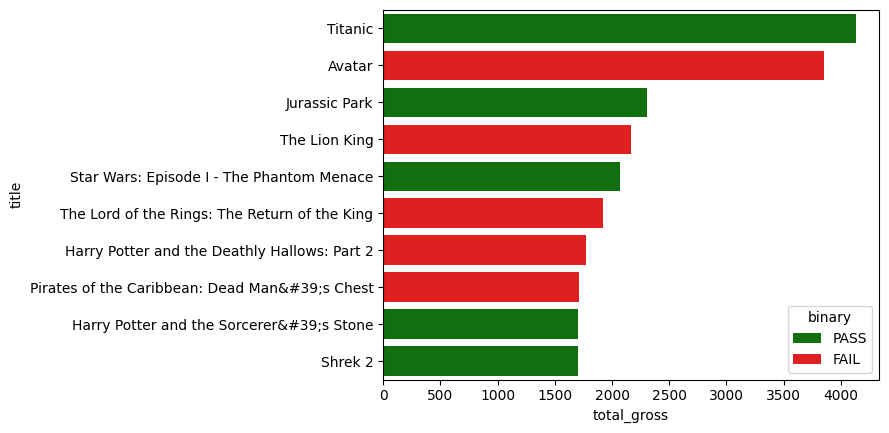

In [ ]:
bechdel
bechdel['total_gross'] = (bechdel.domgross + bechdel.intgross) / 1000000
bechdel = bechdel.sort_values('total_gross',ascending=False).head(10)
sns.barplot(bechdel, y='title',x='total_gross',orient='h',hue='binary',palette={'PASS':'green','FAIL':'red'})

How can we show on the graph which ones passed or failed the Bachdel Test (red failed, green passed)?

#### Bar Plots.
Create a bar plot for the average *total gross* grouped by why the films passsed or failed.
* make sure that total gross is a readable number on the graph

#### Box Plots.
Transform the previous bar graph in a boxplot. Why can we do that and what are the differences? Which one do you think provides more valuable informations?

####Scatterplot
Create a scatterplot looking at the budget versus the total gross.
* make sure the axises are as even as possible
* color this based on whether the film passed or failed the bechdel test; make those colors red for a fail and green for a pass.
* set a linewidth of 0
* what is the graph showing us?

###Lineplot

 Use regular `sns.lineplot` to make a graph of the total gross by year.

* what happens when you use the data as is?
* add a `hue` by the binary
* fix the resulting legend
*[ add better colors ](https://matplotlib.org/stable/gallery/color/named_colors.html)
* what happens if you add a `style=binary` to the function?




####Graphing on Your Own

Make a graph of your own choice, highlighitng something you are interested in from the data. It cannot be any of the above graphs tweaked.
Consider
* what graphs best matches the type of data I am working with?
* what do I need to emphasize to tell the story I want to tell?

### 4. Tweaking Stuff

Anything included in the aesthetic must relate to a column of your dataframe, and will vary based on that column. Each plot has a number of options which can be tweaked, as well; we've already seen `binwidth`. Find reference guides, look things up, and so on.

* `x`, `y` These are used for the x and y
* `size` sets the size points or brush strokes. This can be set to either a number, to change point size, or a columns name to make points vary in size.
* `linewidth` is like size, but for lines rather than points.
* `color` can be used to set the color of *all* points. Check out the[standard HTML list of colors](https://www.w3schools.com/colors/colors_names.asp) or a custom hex color, e.g. "#CC44FF".
* `hue` is used to set colors based on some attribute.
* `alpha` sets the transparency, from 0.0 (transparent) to 1.0 (completely opaque). Can be useful when you have waaaay too many points.
* The default palette is all right, but there are many more [predefined ones](https://seaborn.pydata.org/tutorial/color_palettes.html).



There is only so much time we can dedicate to Seaborn and Matplotlib in this class. We could easily fill an entire course with it. DIDA has an entire Data Visualization course you might consider taking. You can—and should—spend time on your own investigating whenever you have a new idea of how to visualize the data or have time to really fancy up a plot. Even the examples below will use code I have stumbled upon but have not fully explained. Good luck!


___
##### References

**Any Language**
* [BBC Visual and Data Journalism Handbook](https://bbc.github.io/rcookbook/) by the BBC

**Python**
* [Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)
* [Guide to picking a good color palette](https://seaborn.pydata.org/tutorial/color_palettes.html)

**R**
* [ggplot2 cheat sheet](https://github.com/rstudio/cheatsheets/raw/main/data-visualization-2.1.pdf)
* [The R Graph Gallery](https://r-graph-gallery.com/), a collection of different R visualizations, organized by visualization type.
* ["Data Visualization"](https://r4ds.had.co.nz/data-visualisation.html) by Hadley Wickham
* ["ggplot2: Elegant Graphics for Visualization"](https://ggplot2-book.org/index.html) by Hadley Wickham
